# Problem 1
Write a program that computes the trimmed mean estimator with different values
of the number of trimmed data points. Generate n i.i.d. random variables and compare the performance
of the different estimators you get as measured by: 

(a) the mean squared error 

(b) the probability that the difference of the estimator and the true mean is bigger than some threshold c/pn. 
(Measure these quantities by generating a large sample of independent random variables ofthe same distribution.)

Report the results for a wide randge of values of n, c, and block size.

Generate distributions for both light (such as Gaussian, Laplace) and heavy tailed distributions (such as the Pareto family or Student’s t-distribution with different degrees of freedom).

Interpret your findings and make a recommendation for the optimal trimmed value.

## Initial setup
I will generate data for the following distributions:

- Standard Normal
- Beta
- Student-T

For each of the distributions I will use the following initial parameters:

n = 10,15,20,...,495,500

trimmed_pctg = 0.01, 0.02, 0.03, 0.04, 0.05

c = 0.2

And will perform 1000 draws on each distribution


## Summary

### Gaussian

The MSE increases quite quickly when the trimmed mean range is increased but grows significantly more for small sample sizes. As the sample size is increased the MSE moves closer to 0.

The probability of exceding the threshold grows steadily with the trimmed mean increase but remains stable when increasing sample size, being consistenly larger for larger sample sizes. 

### Beta
The MSE increases at a faster rate when the trimmed mean range increases but remains into an stable cycle as as the sample size increases, visibly showing larger MSE for bigger trimmed mean ranges. 

The probability remains 0 until trimmed mean range reaches 4%, then it starts increasing but with no significant differentiation on the sample size. Similary increasing the sample size triggers the probability increase at around 400 sample size but remains the same growth regardless of the trimmed range mean increase.

### Student-t
MSE follows the same pattern of growing as the trimmed mean range increases but the MSE reached is considerable larger. Regardless of the much larger MSE it decreases quickly as the sample size increases

Similarly, the probability of surpassing the threshold is bigger in quantity, but increases (although at a lower pace) when trimmed mean range is increased. As for sample size increase also doesn't affect the probability which is constantly higher for larger sample sizes.


In [395]:
# import libraries and set seed
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set(style="darkgrid")
import warnings
from scipy.linalg import hadamard, subspace_angles

np.random.seed(666)

In [396]:
# helper functions 

def mse(x1, x2):
    return((x1-x2)**2)

def generate_data(tag, n):
    data = []
    if tag == 'gaussian': data = np.random.normal(0,1,n)
    if tag == 'laplace': data = np.random.laplace(0,1,n)
    if tag == 'studentt': data = np.random.standard_t(5,n)
    if tag == 'pareto': data = np.random.pareto(1,n)
    if tag == 'beta': data = np.random.beta(2,5,n)
    return data

def get_data(n, trimmed, tag, reps, thres):
    proba = 0
    mserr_trimmed = 0
    for x in range(reps):
        data = generate_data(tag, n)
        sample_mean = data.mean()
        trimmed_mean = stats.trim_mean(data, trimmed)
        mserr_trimmed = mserr_trimmed + mse(trimmed_mean, sample_mean)
        diff = sample_mean - trimmed_mean
        if abs(diff) > thres:
            proba = proba + 1
    proba = proba/reps
    mserr_trimmed/reps
    return tag, n, trim, mserr_trimmed, proba

In [397]:
# initial settiings
n = range(10,500,5)
trimmed_pctg = [0.01, 0.02, 0.03, 0.04, 0.05]
c = 0.2
reps = 1000

df_results = pd.DataFrame()
# loops for n and trim pctg
for sample_size in n:
    thres = c / sample_size**(1/2)
    for trim in trimmed_pctg:
        # generate distributions and get results
        df_results = df_results.append([get_data(sample_size, trim, 'gaussian', reps, thres)])
        df_results = df_results.append([get_data(sample_size, trim, 'beta', reps, thres)])
        df_results = df_results.append([get_data(sample_size, trim, 'studentt', reps, thres)])

df_results.columns = ['dist', 'n','trim','mse_trim', 'proba']
df_results = df_results.reset_index()

## Gaussian distribution

In [398]:
# set distribution to use
df_output = df_results[df_results['dist']=='gaussian'].reset_index()
df_output = df_output[['dist','n','trim','mse_trim', 'proba']]

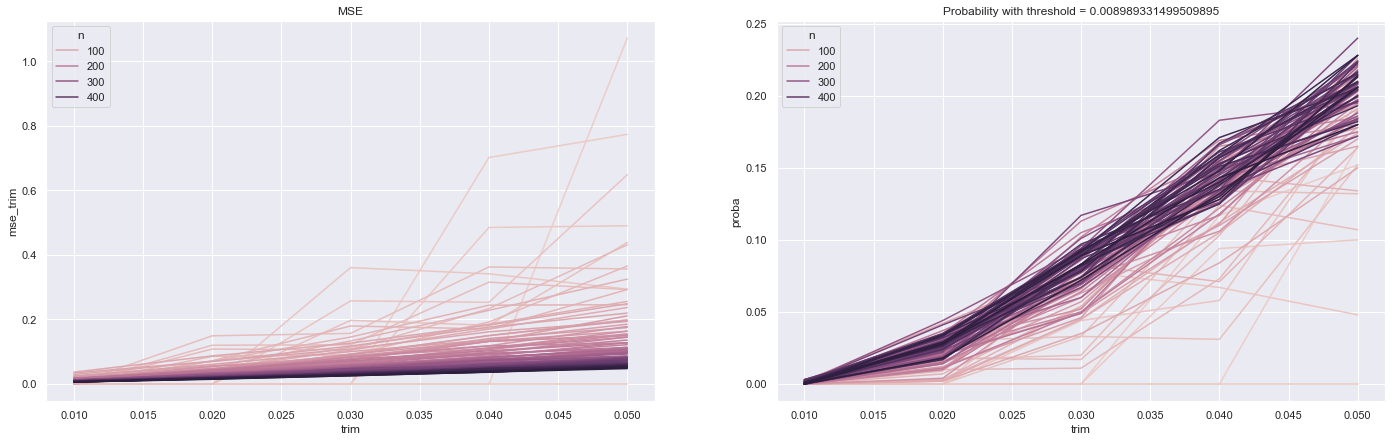

<Figure size 640x480 with 0 Axes>

In [399]:
# MSE and probability by changing the trimmed percentage for trimmed mean
fig1, ax1 = plt.subplots(1, 2, figsize=(24,7))
figure(figsize=(8, 6), dpi=80)
ax1[0].set_title(label = 'MSE')
ax1[1].set_title(label = 'Probability with threshold = '+ str(thres));
p1 = sns.lineplot(data=df_output, ax=ax1[0], y='mse_trim', x='trim', hue='n');
p2 = sns.lineplot(data=df_output, ax=ax1[1], y='proba', x='trim', hue='n');

## 

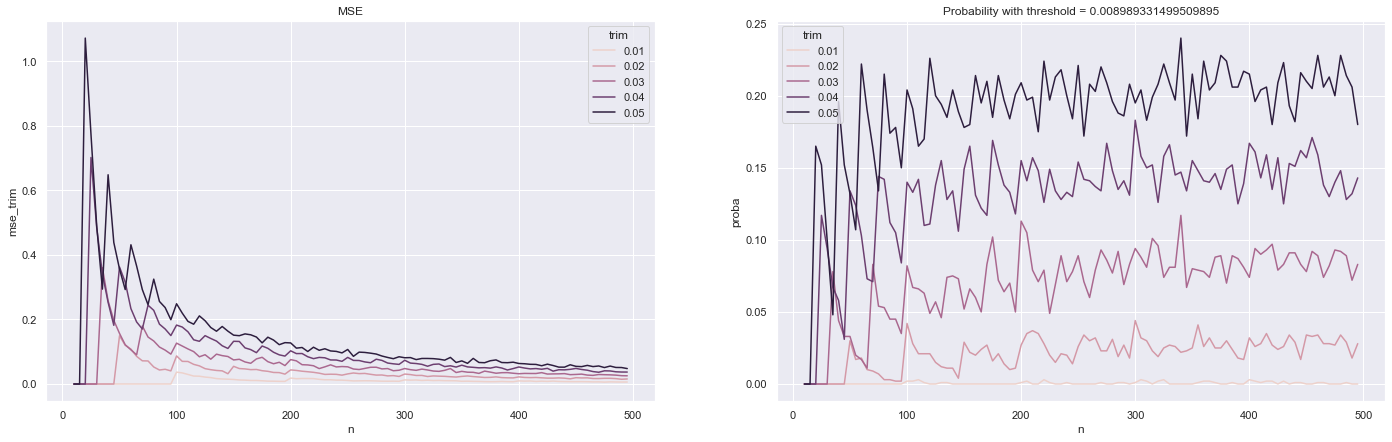

<Figure size 640x480 with 0 Axes>

In [400]:
# mse vs trim
fig1, ax1 = plt.subplots(1, 2, figsize=(24,7))
figure(figsize=(8, 6), dpi=80)
ax1[0].set_title(label = 'MSE')
ax1[1].set_title(label = 'Probability with threshold = '+ str(thres))
p3 = sns.lineplot(data=df_output, ax=ax1[0], y='mse_trim', x='n', hue='trim');
p4 = sns.lineplot(data=df_output, ax=ax1[1], y='proba', x='n', hue='trim');

## Beta

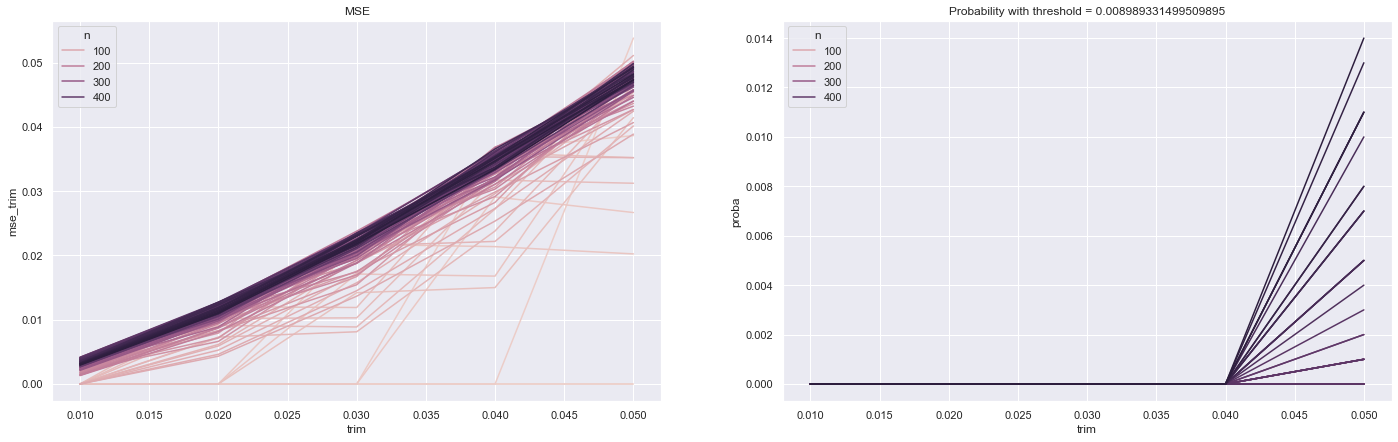

<Figure size 640x480 with 0 Axes>

In [401]:
# set distribution to use
df_output = df_results[df_results['dist']=='beta'].reset_index()
df_output = df_output[['dist','n','trim','mse_trim', 'proba']]

fig1, ax1 = plt.subplots(1, 2, figsize=(24,7))
figure(figsize=(8, 6), dpi=80)
ax1[0].set_title(label = 'MSE')
ax1[1].set_title(label = 'Probability with threshold = '+ str(thres));
p5 = sns.lineplot(data=df_output, ax=ax1[0], y='mse_trim', x='trim', hue='n');
p6 = sns.lineplot(data=df_output, ax=ax1[1], y='proba', x='trim', hue='n');

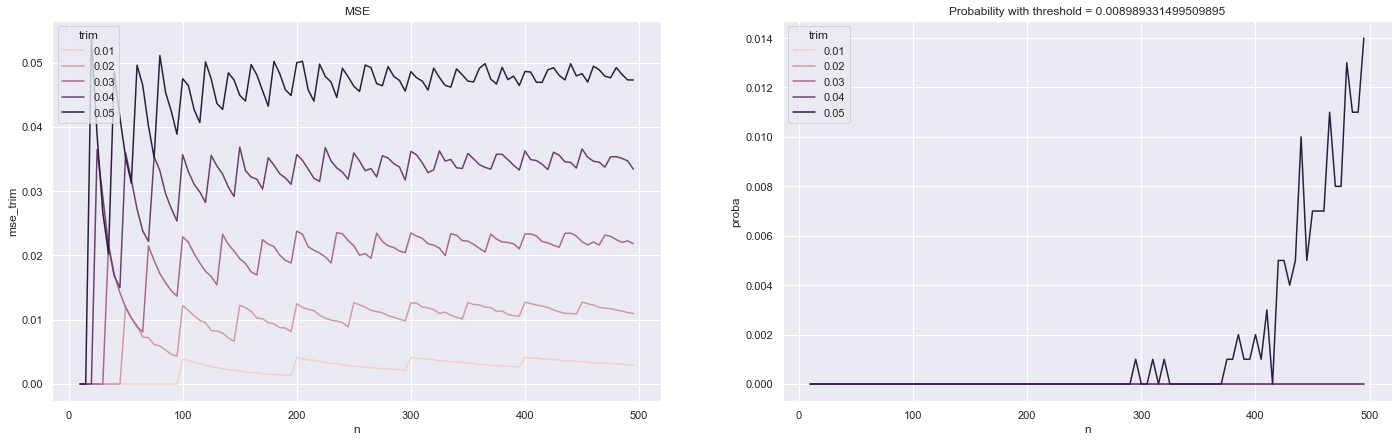

<Figure size 640x480 with 0 Axes>

In [402]:
# mse vs trim
fig1, ax1 = plt.subplots(1, 2, figsize=(24,7))
figure(figsize=(8, 6), dpi=80)
ax1[0].set_title(label = 'MSE')
ax1[1].set_title(label = 'Probability with threshold = '+ str(thres))
p7 = sns.lineplot(data=df_output, ax=ax1[0], y='mse_trim', x='n', hue='trim');
p8 = sns.lineplot(data=df_output, ax=ax1[1], y='proba', x='n', hue='trim');

## Student-T

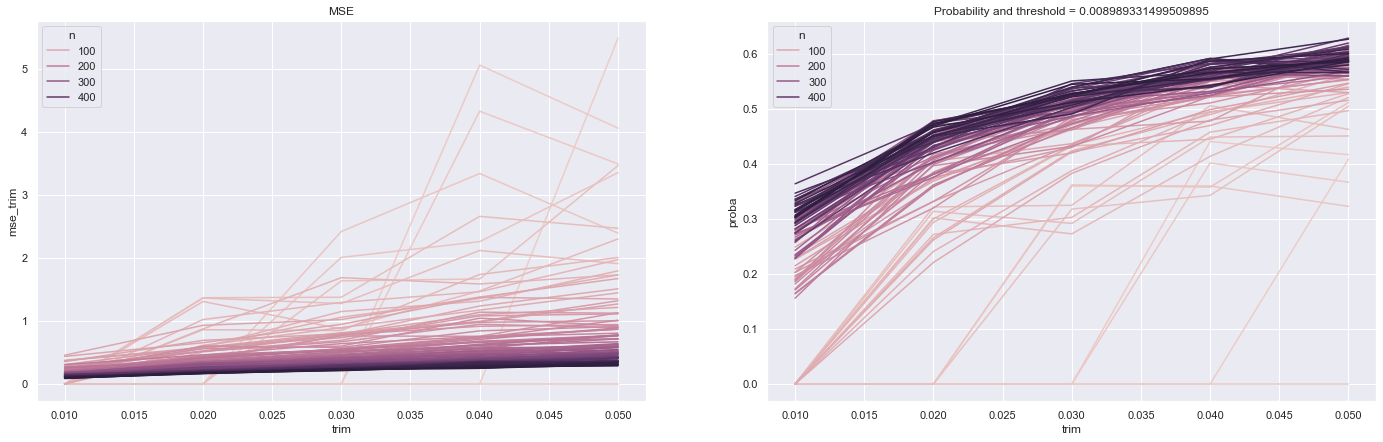

<Figure size 640x480 with 0 Axes>

In [403]:
# set distribution to use
df_output = df_results[df_results['dist']=='studentt'].reset_index()
df_output = df_output[['dist','n','trim','mse_trim', 'proba']]

fig1, ax1 = plt.subplots(1, 2, figsize=(24,7))
figure(figsize=(8, 6), dpi=80)
ax1[0].set_title(label = 'MSE')
ax1[1].set_title(label = 'Probability and threshold = '+ str(thres));
p1 = sns.lineplot(data=df_output, ax=ax1[0], y='mse_trim', x='trim', hue='n');
p2 = sns.lineplot(data=df_output, ax=ax1[1], y='proba', x='trim', hue='n');

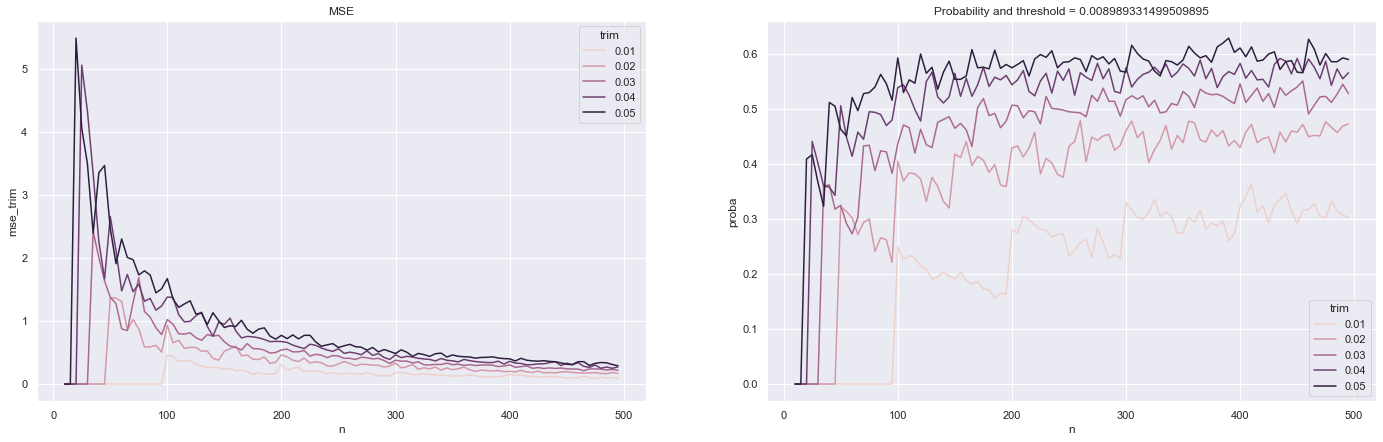

<Figure size 640x480 with 0 Axes>

In [404]:
# mse vs trim
fig1, ax1 = plt.subplots(1, 2, figsize=(24,7))
figure(figsize=(8, 6), dpi=80)
ax1[0].set_title(label = 'MSE')
ax1[1].set_title(label = 'Probability and threshold = '+ str(thres))
p1 = sns.lineplot(data=df_output, ax=ax1[0], y='mse_trim', x='n', hue='trim');
p2 = sns.lineplot(data=df_output, ax=ax1[1], y='proba', x='n', hue='trim');

# Problem 4
Write a program that generates n independent random points, uniformly distributed inside the d-dimensional cube [−1, 1]d. 

Plot the distances between all pairs of points. 

Plot the angle from the origin to the points for all pairs of points. 

Choose a variety of values of n (say n = 10, 30, 50) and d (such as d = 1, 3, 100). Explain what you observe.

In [405]:
# helper functions
import itertools

def get_angles(x, y):
    costheta = np.einsum('ij,kj->ik', x, y) # Directly gives costheta, since
                                            # ||x|| = ||y|| = 1
    return np.arccos(costheta)

def angle_rowwise(A, B):
    p1 = np.einsum('ij,ij->i',A,B)
    p2 = np.linalg.norm(A,axis=1)
    p3 = np.linalg.norm(B,axis=1)
    p4 = p1 / (p2*p3)
    return np.arccos(np.clip(p4,-1.0,1.0))

def get_angles_custom(data,n):
    combinations = pd.DataFrame(list(itertools.combinations(list(range(len(data))), 2)))
    temp = pd.DataFrame()
    dots = []
    l2_norm_i = []
    l2_norm_j = []
    samples = pd.DataFrame(data)
    for i in range(combinations.shape[0]):
        dots.append(np.dot(samples.iloc[int(combinations.iloc[i][0])], samples.iloc[int(combinations.iloc[i][1])]))
        l2_norm_i.append(np.dot(samples.iloc[int(combinations.iloc[i][0])], samples.iloc[int(combinations.iloc[i][0])])**0.5)
        l2_norm_j.append(np.dot(samples.iloc[int(combinations.iloc[i][1])], samples.iloc[int(combinations.iloc[i][1])])**0.5)
    temp["dot(i,j)"] = dots
    temp["L2 norm_i"] = l2_norm_i
    temp["L2 norm_j"] = l2_norm_j
    return np.arccos(temp["dot(i,j)"]/(temp["L2 norm_i"]*temp["L2 norm_j"]))*180/np.pi

def get_distance_matrix(data):
    dist_data = squareform(data)
    return dist_data

def generate_d_dim_cube(n, d):
    data = np.empty([n,d])
    for x in range(n):
        data[x] = np.random.uniform(-1,1,d)
    return data


## Initial Setup

Generated x Unif(−1,1) iid vectors with: 

n = 10,30,50,100

d = 1,3,100,500 dimensions

Euclidean distance and cosine formula used to calculate distance and angle data for each pairwise combination of vector in the generated sample.

## Distances
We can see that as the number of dimensions increases the pairwise distance between the vectors (points) is bigger.  While the combination of the sample and dimesion increase causes the distribution of the distance to resemble a normal distribution.

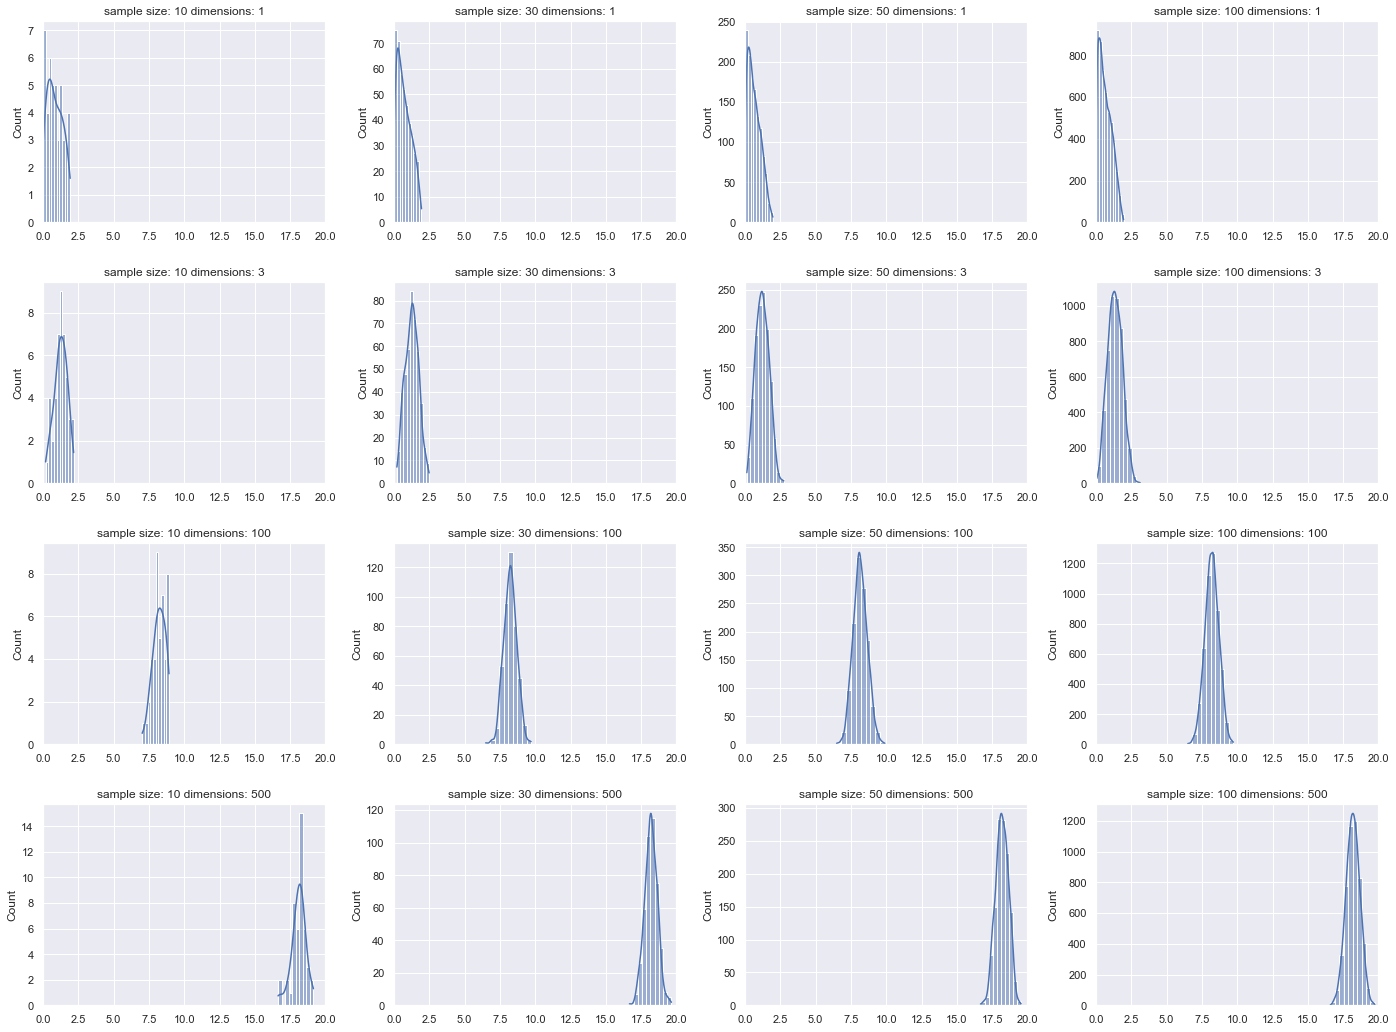

<Figure size 640x480 with 0 Axes>

In [406]:
# get and graph distances
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# settings
n = [10,30,50,100]
d = [1,3,100,500]

fig1, ax1 = plt.subplots(len(d), len(n), figsize=(20,15))
#fig2, ax2 = plt.subplots(len(d), len(n), figsize=(20,10))
figure(figsize=(8, 6), dpi=80)
fig1.tight_layout(pad=3.0)

# loop through options
for i in range(len(n)):
    for j in range(len(d)):      
        points = generate_d_dim_cube(n[i],d[j])
        distances = pdist(points)
        df_points = pd.DataFrame(points)
        df_distances = pd.DataFrame(distances)
        ax1[j,i].set_title(label = 'sample size: '+str(n[i])+' dimensions: '+str(d[j]))
        p1 = sns.histplot(df_distances, ax=ax1[j,i], legend=False, kde=True, bins=10);
        p1.set_xlim(0,20)



## Angles

Regarding the angles they are located on the extremes (close to 0 or close to 180) when dimensionality is low. While as we increase the dimensionality the angles become centered around 90 degrees and very close to being orthogonal to each other as analyzed in class. Again the increase of dimension and sample size causes the distribution of the angles to resemble a normal distribution.

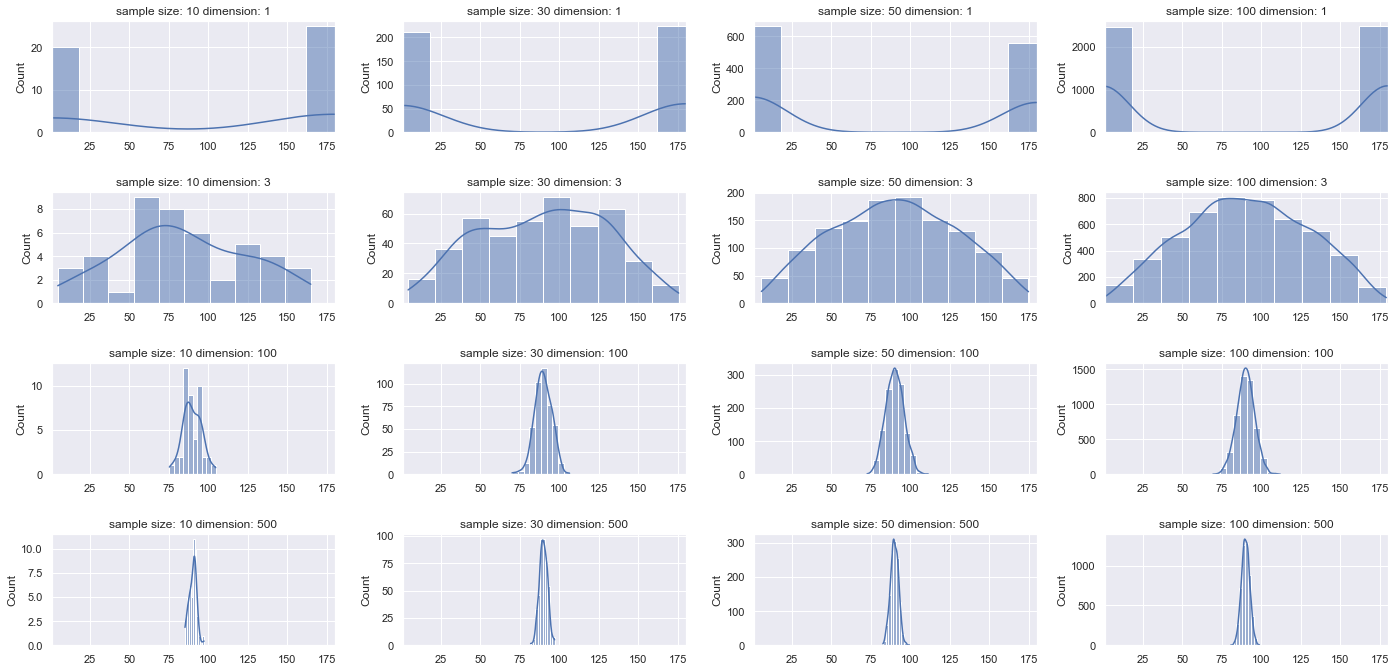

<Figure size 640x480 with 0 Axes>

In [407]:
# get and graph angles
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

# settings
n = [10,30,50,100]
d = [1,3,100,500]

fig2, ax2 = plt.subplots(len(d), len(n), figsize=(20,10))
figure(figsize=(8, 6), dpi=80)
fig2.tight_layout(pad=3.0)

# loop through options
for i in range(len(n)):
    for j in range(len(d)):
        points = generate_d_dim_cube(n[i],d[j])
        angles = get_angles_custom(points, n[i])
        df_points = pd.DataFrame(points)
        df_distances = pd.DataFrame(distances)
        df_angles = pd.DataFrame(angles)
        ax2[j,i].set_title(label = 'sample size: '+str(n[i])+' dimension: '+str(d[j]))
        p2 = sns.histplot(df_angles, ax=ax2[j,i], legend=False, kde=True, bins=10);
        p2.set_xlim(1,180)
        